## Oppstart

In [9]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [10]:
from module_update import update, css

In [11]:
css()

In [12]:
import warnings
warnings.filterwarnings('ignore')

### Note that the file `nbtext.py` will be overwritten in the code below

This is probably ok, though. If not, change `update('nbtext', overwrite = True)` to `update('nbtext', overwrite = False)` and the file will stay unchanged. 


In [13]:
update('graph_networkx_louvain')
update('nbtext', overwrite=True)
update('token_map')
import nbtext as nb
import token_map as tm
from nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


Updated file `D:\Documents\GitHub\NER\graph_networkx_louvain.py`

Updated file `D:\Documents\GitHub\NER\nbtext.py`

Updated file `D:\Documents\GitHub\NER\token_map.py`

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)


# Eksempel

I eksemplet ser vi først på en tilfeldig bok, deretter mulighetene for å gjøre det samme med et helt korpus.

## Korpus

Bygg først et korpus, enten fra `

In [14]:
korpus = nb.book_corpus(author='hamsun%')

In [15]:
#korpus = nb.restore_metadata_from_excel('metadatafil.xls')

## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det.

In [16]:
nb.urn_concordance(word = 'arbeid', urns = list(korpus['urn']))

"Knut Hamsuns brev, Hamsun, Knut, 1997","for oppmuntring , råd og",arbeid,som korrekturleser .
"Knut Hamsuns brev, Hamsun, Knut, 1997",") , men i sitt",arbeid,for å opprette mødre- og
"Knut Hamsuns brev, Hamsun, Knut, 1997",inn i striden med sitt,arbeid,Ad quadratum . Det ble
"Knut Hamsuns brev, Hamsun, Knut, 1997",1918 fikk Landstad igjen fast,arbeid,som pressemann .
"Knut Hamsuns brev, Hamsun, Knut, 1997",måtte til slutt ta fast,arbeid,i forskjellige aviser . Fra
"Knut Hamsun som han var, Hamsun, Knut, 1956",distraherte ham i hans litterære,arbeid,. Han begynte å innskrenke
"Knut Hamsun som han var, Hamsun, Knut, 1956",tok fatt på et anstrengende,arbeid,. Alltid skrev han en
"Knut Hamsun som han var, Hamsun, Knut, 1956",gjennem et intenst og oppslitende,arbeid,hadde skapt seg sitt eget
"Knut Hamsun som han var, Hamsun, Knut, 1956",seg distrahere i sitt egentlige,arbeid,. I grunnen var det
"Knut Hamsun som han var, Hamsun, Knut, 1956","skolelærer , og alt sitt",arbeid,skjøttet han med alvor og
"Hamsuns beste, Hamsun, Knut, 2005",kunne han skrive om sitt,arbeid,: « Dog maa jeg


## Navn

Finn forslag til navn med `names`. Se på dem med `show_names`. Her er det muligheter til å skru litt på parametrene. Hvis ratioen skrus ned fjernes en del ord, og om cutoff settes høyere vil også enkelte navneforslag kunne forsvinne.

In [42]:
def pure_urn(data):
    """Convert URN-lists with extra data into list of serial numbers.
    Args:
        data: May be a list of URNs, a list of lists with URNs as their
            initial element, or a string of raw texts containing URNs
    Returns:
        List[str]: A list of URNs. Empty list if input is on the wrong
            format or contains no URNs
    """
    import numpy as np
    korpus_def = []
    if isinstance(data, list):
        if not data:  # Empty list
            korpus_def = []
        if isinstance(data[0], list):  # List of lists
            try:
                korpus_def = [x[0] for x in data]
            except IndexError:
                korpus_def = []
        else:  # Assume data is already a list of URNs
            korpus_def = data
    elif isinstance(data, str):
        korpus_def = urn_from_text(data)
    elif isinstance(data, (int, np.integer)):
        korpus_def = [str(data)]    
    elif isinstance(data, pd.DataFrame):
        korpus_def = list(data[data.columns[0]])
    elif isinstance(data, pd.Series):
        korpus_def = list(data)
    return korpus_def

In [39]:
korpus['urn'][0]

2008091204050

In [29]:
nb.pure_urn??

In [43]:
pure_urn(korpus['urn'][3])

['2012092606124']

In [50]:
pure_urn(korpus['urn'])[1:2]

[2012011606022]

In [56]:
navn = nb.names(pure_urn(korpus['urn'][10]), ratio=0.2, cutoff=2)
tm.show_names(navn)

Lag 1

    Joakim - 235
    Magrete - 152
    Karolus - 149
    Polden - 136
    Teodor - 127
    Doppen - 120
    Papst - 115
    Dokker - 94
    Ragna - 92
    Romeo - 90
    Maria - 86
    Gud - 79
    Mattea - 77
    Amerika - 67
    Skåro - 66
    Håbjørg - 65
    Håkon - 65
    Trondhjem - 58
    Lofoten - 54
    Gabrielsen - 44
    Nils - 42
    Lorensen - 37
    Magnus - 36
    Edevarts - 33
    Ellingsen - 28
    Josefine - 26
    Bergen - 25
    Anders - 24
    Karel - 24
    Knoffs - 23
    Martinus - 23
    Måsen - 23
    Våde - 23
    Fosenlandet - 21
    Hamsun - 20
    Augusts - 19
    Guds - 17
    Kleiva - 16
    Beret - 14
    Julie - 14
    Levanger - 12
    Skåros - 12
    Tykje - 12
    Bodø - 11
    Olga - 11
    Ytrepolden - 11
    Norge - 10
    Hermine - 9
    Indien - 9
    Poldens - 9
    Riga - 9
    Vestfjorden - 9
    Dem - 8
    Soleglad - 8
    Stokmarknes - 8
    Dokkers - 7
    Lofotfisket - 7
    New - 7
    Rusland - 7
    Spanien - 7
    Andreassen 

Listen trenger litt redigering, og sammenslåing.

In [19]:
tm.read_token_map_file??

In [20]:
tm.names_to_token_map_file(navn, filename="en_bok.xls")

True

### Redigeringsaktivitet

Rediger filen fra cellen med lagringskommando (`names_to_token_map_file(....)`)
Åpne i for eksempel i excel eller tilsvarende som for eksempel openoffice eller libreoffice. Etter redigering, kjøres cellen under. Husk bare å benytte riktig filnavn. 

In [21]:
redigerte_navn = tm.read_token_map_file("en_bok.xls")

Listen med redigerte navn går inn i grafen - vi tar med oss variabelen BOOK defineret over sammen listen:

In [23]:
G = tm.character_network(int(korpus['urn'][3]), redigerte_navn)

Dernest kan den vises og analyseres med passende kommandoer

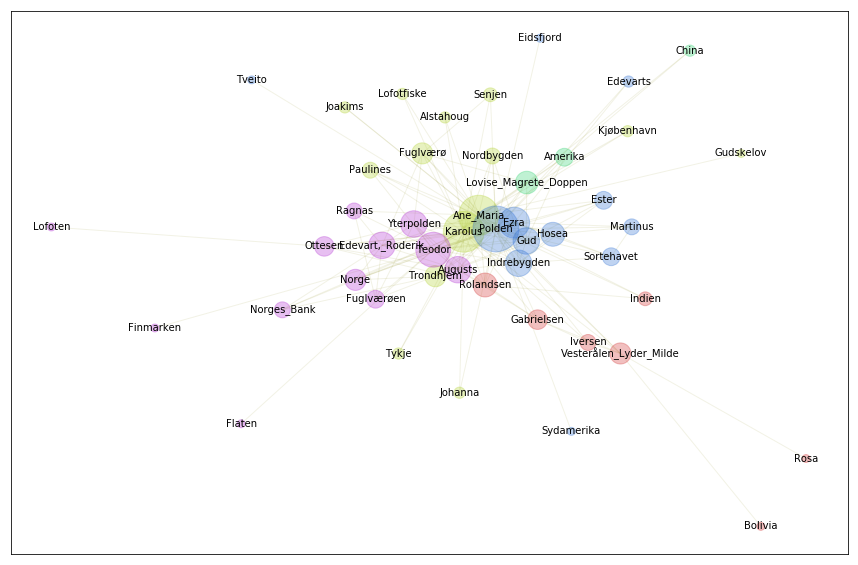

In [24]:
gnl.show_graph(G)

In [25]:
gnl.show_communities(G)

Karolus-Ane_Maria :  Karolus, Ane_Maria, Trondhjem, Fuglværø, Paulines, Nordbygden, Senjen, Alstahoug, Tykje, Kjøbenhavn, Johanna, Joakims, Lofotfiske, Gudskelov

Lovise_Magrete_Doppen-Amerika :  Lovise_Magrete_Doppen, Amerika, China

Polden-Ezra :  Polden, Ezra, Gud, Indrebygden, Hosea, Sortehavet, Ester, Martinus, Edevarts, Eidsfjord, Tveito, Sydamerika

Teodor-Augusts :  Teodor, Augusts, Edevart,_Roderik, Yterpolden, Norge, Ottesen, Fuglværøen, Norges_Bank, Ragnas, Lofoten, Finmarken, Flaten

Rolandsen-Vesterålen_Lyder_Milde :  Rolandsen, Vesterålen_Lyder_Milde, Gabrielsen, Iversen, Indien, Rosa, Bolivia

